In [2]:
import numpy as np
A = np.random.rand(3,4) #3 x4 
U, S, V = np.linalg.svd(A) # S is just an array of eigenvalues A = S x U x V^T
print(U) #3x3
print(S) # nó chỉ lưu 3 phần tử trên đường chéo chính thôi
print(V) # 4x4

[[-0.35973803 -0.83289641  0.42056168]
 [-0.66424759 -0.08793104 -0.74232289]
 [-0.65525849  0.54639885  0.52161729]]
[1.73666947 0.58924139 0.19483283]
[[-0.5759578  -0.55634221 -0.43852445 -0.40798562]
 [-0.61606717  0.68165273  0.23760542 -0.31520542]
 [-0.21643596  0.32597809 -0.69282341  0.60571403]
 [-0.49182246 -0.34579067  0.52080293  0.60605593]]


# Singular Value Decomposition


## Image

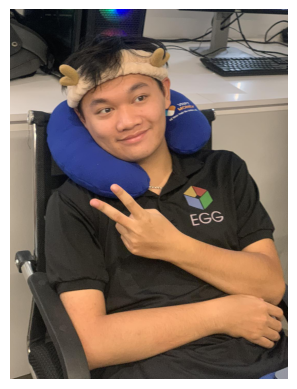

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# đọc ảnh
img = mpimg.imread('vietdepzai.jpg')
imgplot = plt.imshow(img) 
plt.axis('off')
plt.show()



In [12]:
img.shape

(1440, 1080, 3)

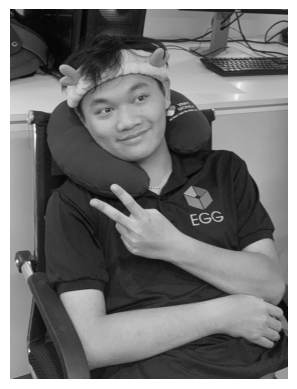

(1440, 1080)

In [16]:
grayimg = np.dot(img, [0.299, 0.587, 0.114])
plt.imshow(grayimg) # ảnh sau khi gray scale theo công thức Y=0.299×R+0.587×G+0.114×B 
plt.imshow(grayimg, cmap = 'gray') # vẽ ảnh màu xám

plt.axis('off')
plt.show()
grayimg.shape


In [5]:
U,S,V = np.linalg.svd(grayimg)

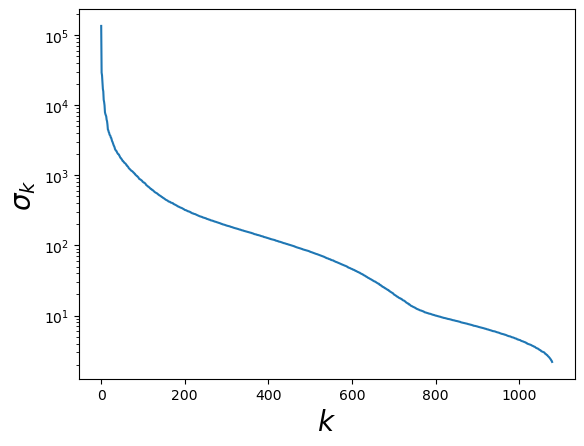

In [6]:
# vẽ các singular value của ma trận A 
plt.semilogy(S) # những cái cột thì là theo hàm mũ
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
plt.show()

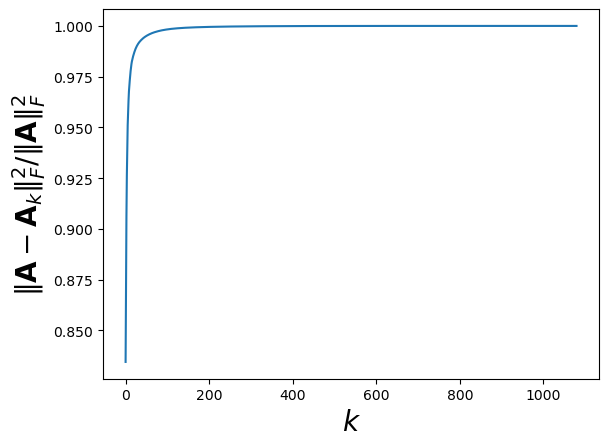

In [7]:
a = np.sum(S**2) # frobenius norm of S
b = np.zeros_like(S) 
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a #|| A - A[i]||^2 / ||A||^2
e = 1-b 
plt.plot(b)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\|\mathbf{A} - \mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
plt.show()

In [8]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

A1 = []
K = [5,10,20,25, 50, 100]
for k in K:
    A1.append(approx_rank_k(U, S, V,k))

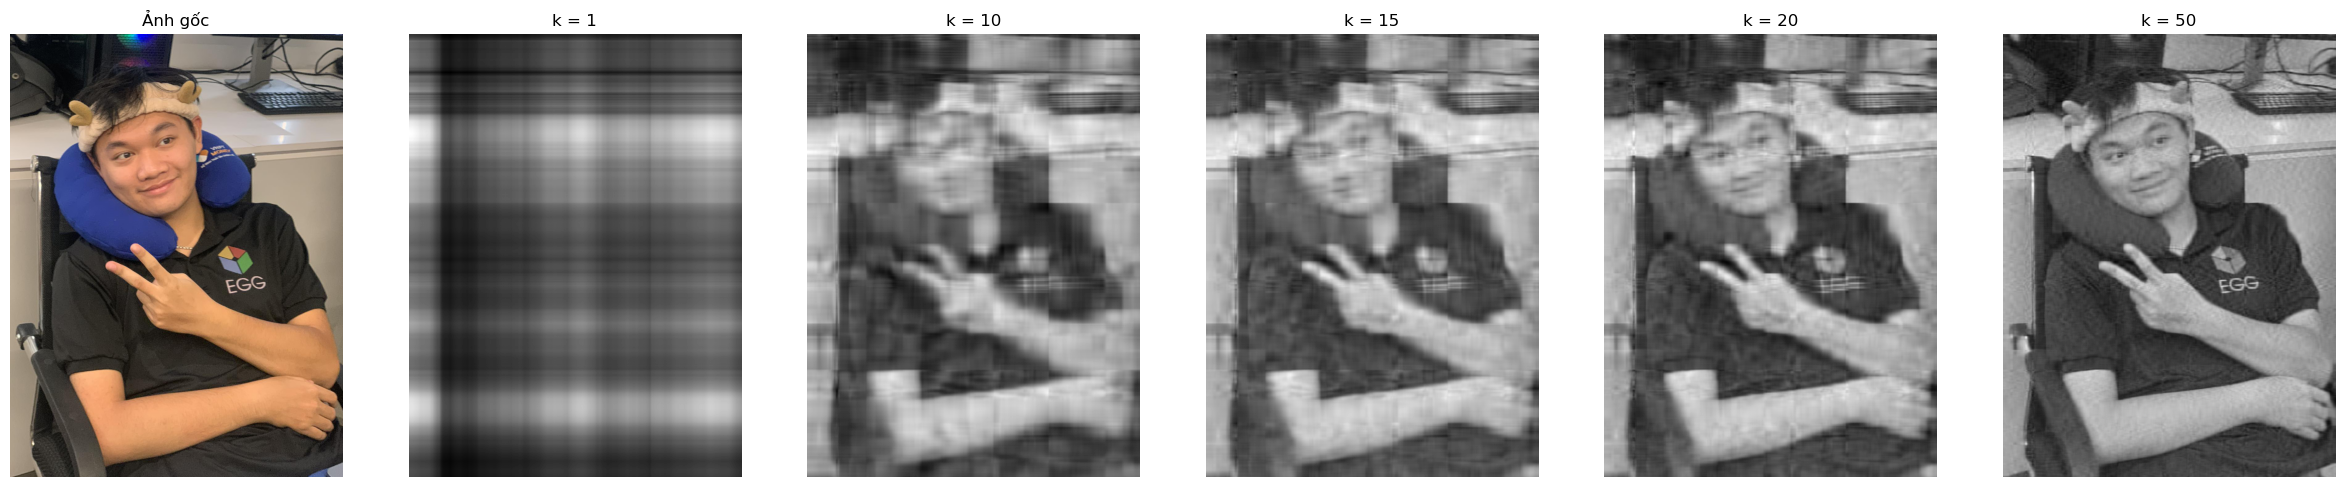

In [9]:

k_values = [1,10,15, 20, 50]

# Hiển thị ảnh gốc
plt.figure(figsize=(30, 15))
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

# Hiển thị các ảnh nén với các giá trị k khác nhau
for i, k in enumerate(k_values):
    compressed_img = approx_rank_k(U, S, V, k)
    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(compressed_img, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.show()


## Use built-in function

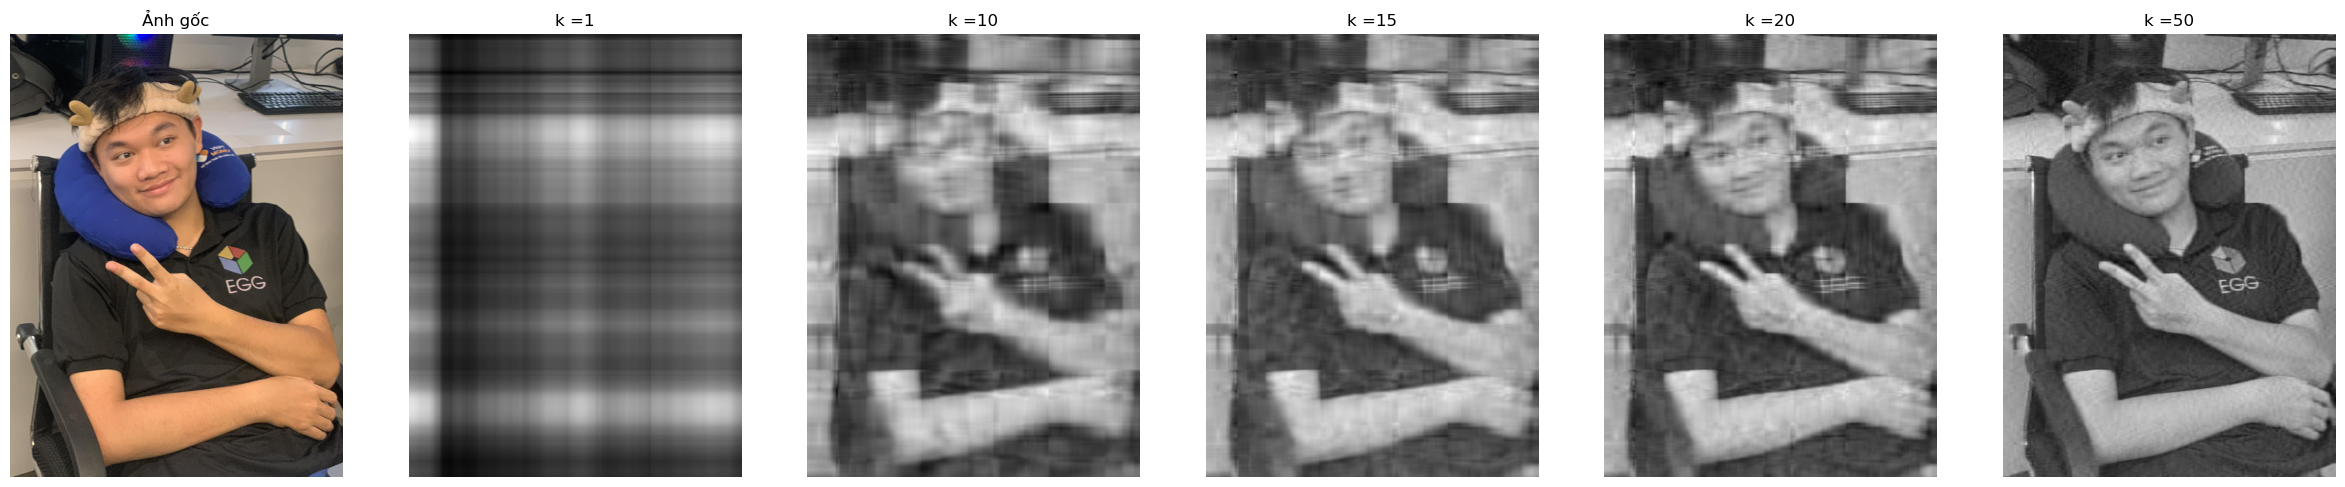

In [10]:
from sklearn.decomposition import TruncatedSVD

# Hiển thị ảnh gốc
plt.figure(figsize=(30, 15))
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

# Hiển thị các ảnh nén với các giá trị k khác nhau
for i, k in enumerate(k_values):
    svd = TruncatedSVD(n_components=k) # chọn xem lấy bao nhiêu singular value
    img_transformed = svd.fit_transform(grayimg) 
    img_restored = svd.inverse_transform(img_transformed)
    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(img_restored, cmap='gray')
    plt.title(f'k ={k}')
    plt.axis('off')

plt.show()

# Principal Component Analysis

[0.2926718]
[0.2926718  0.17101809 0.14705821 0.07452637 0.06016691 0.04010942
 0.02958307 0.0239813  0.01981879 0.01293592]
[0.2926718  0.17101809 0.14705821 0.07452637 0.06016691 0.04010942
 0.02958307 0.0239813  0.01981879 0.01293592 0.01097004 0.01029801
 0.00984153 0.00752217 0.00630439]
[0.2926718  0.17101809 0.14705821 0.07452637 0.06016691 0.04010942
 0.02958307 0.0239813  0.01981879 0.01293592 0.01097004 0.01029801
 0.00984153 0.00752217 0.00630439 0.00535795 0.00417112 0.00402455
 0.00347723 0.0031858 ]
[0.2926718  0.17101809 0.14705821 0.07452637 0.06016691 0.04010942
 0.02958307 0.0239813  0.01981879 0.01293592 0.01097004 0.01029801
 0.00984153 0.00752217 0.00630439 0.00535795 0.00417112 0.00402455
 0.00347723 0.00318581 0.00299675 0.00283057 0.00275633 0.00243371
 0.00226492 0.00198342 0.00194511 0.0017432  0.00164844 0.00149546
 0.00141412 0.00132241 0.00126822 0.00116753 0.00109237 0.00105403
 0.00101606 0.00094886 0.00092976 0.00086554 0.00085647 0.00083506
 0.00079789 

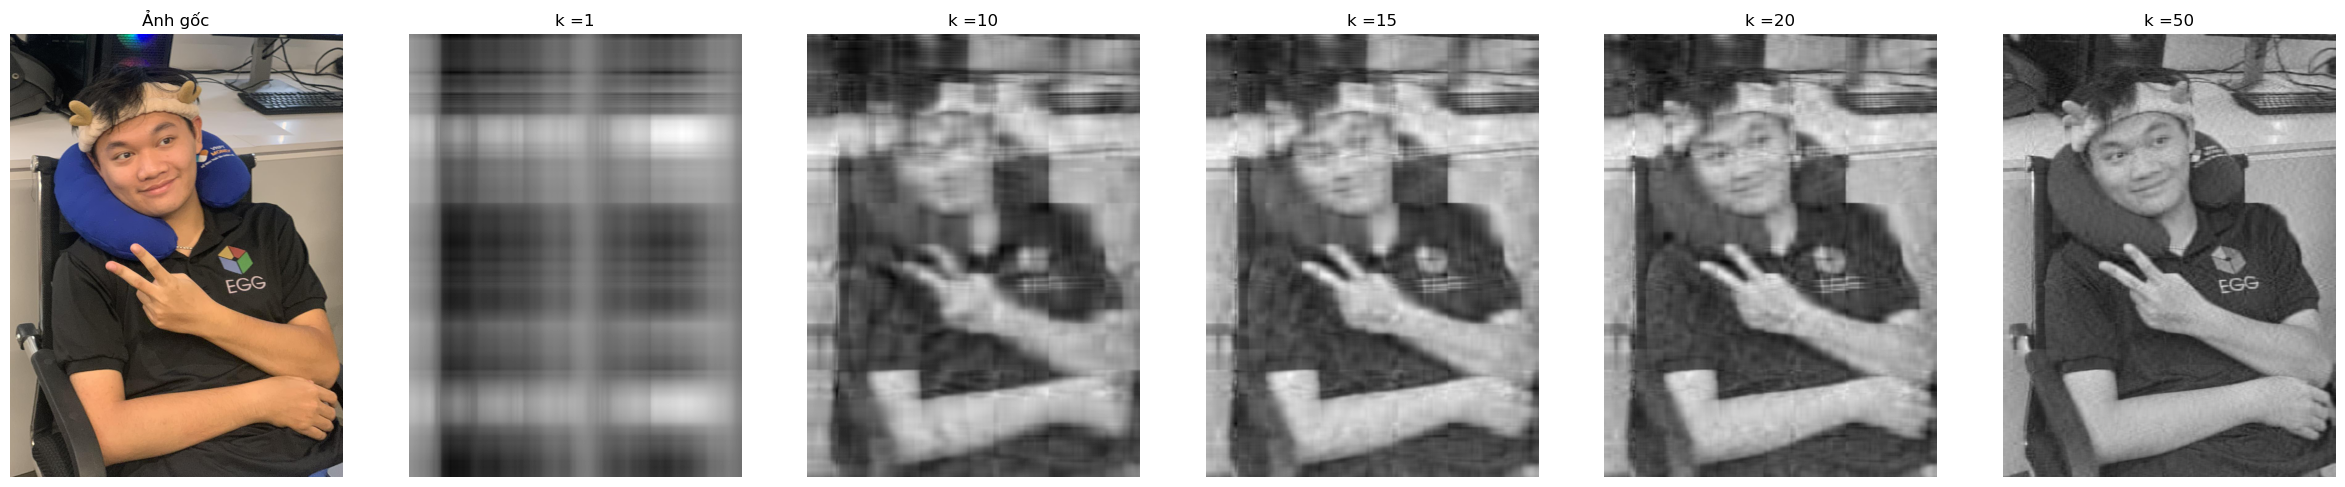

In [17]:
from sklearn.decomposition import PCA
# Hiển thị ảnh gốc
plt.figure(figsize=(30, 15))
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

# Hiển thị các ảnh nén với các giá trị k khác nhau
for i, k in enumerate(k_values):
    pca = PCA(n_components=k) 
    img_transformed = pca.fit_transform(grayimg) # như svd
    print(pca.explained_variance_ratio_) # in ra lượng thông tin giữ lại
    img_restored = pca.inverse_transform(img_transformed) # ảnh trả về sau khi giảm chiều
    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(img_restored, cmap='gray')
    plt.title(f'k ={k}')
    plt.axis('off')

plt.show()
